Logistic Regression

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

# 1. Introduction

### 1.1 Background
Nowadays with the development of remote equipments and  communication technologies, the pace of life has become more compact, which caused people are working longer, and the pressure of workers is also increasing fast.At the same time, in such an environment, people usually do not take good care of their bodies, leading to the onset of various diseases.Heart disease as one of  the most common circulatory system diseases, because of its sudden onset and unpredictability, often can not be prevented to cause a fatal blow to patients. It is a huge threat to health.

### 1.2 Objective
Therefore, in this project, my interest is to classify the high-risk and low-risk population by using machine learning (supervised learning and unsupervised learning) through 14 attributes that may be associated with cardiac disease, such as patient's age, gender, type of chest pain, resting blood pressure, fasting blood sugar, etc.In the comparison of each model, we want to select the most accurate and most robust model.

In [4]:
heart_disease=pd.read_csv('heart.csv')#import data as dataframe
heart_disease.columns          #chcek columns name

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Visualization

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
hear_disease.describe()

In [6]:
plt.figure(figsize= (10, 6))
corrMatrix = heart_disease.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

NameError: name 'heart_disease' is not defined

<Figure size 720x432 with 0 Axes>

c:\users\arya srivastava\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\arya srivastava\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\arya srivastava\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

Text(0.5, 1.0, 'resting electrocardiographic results')

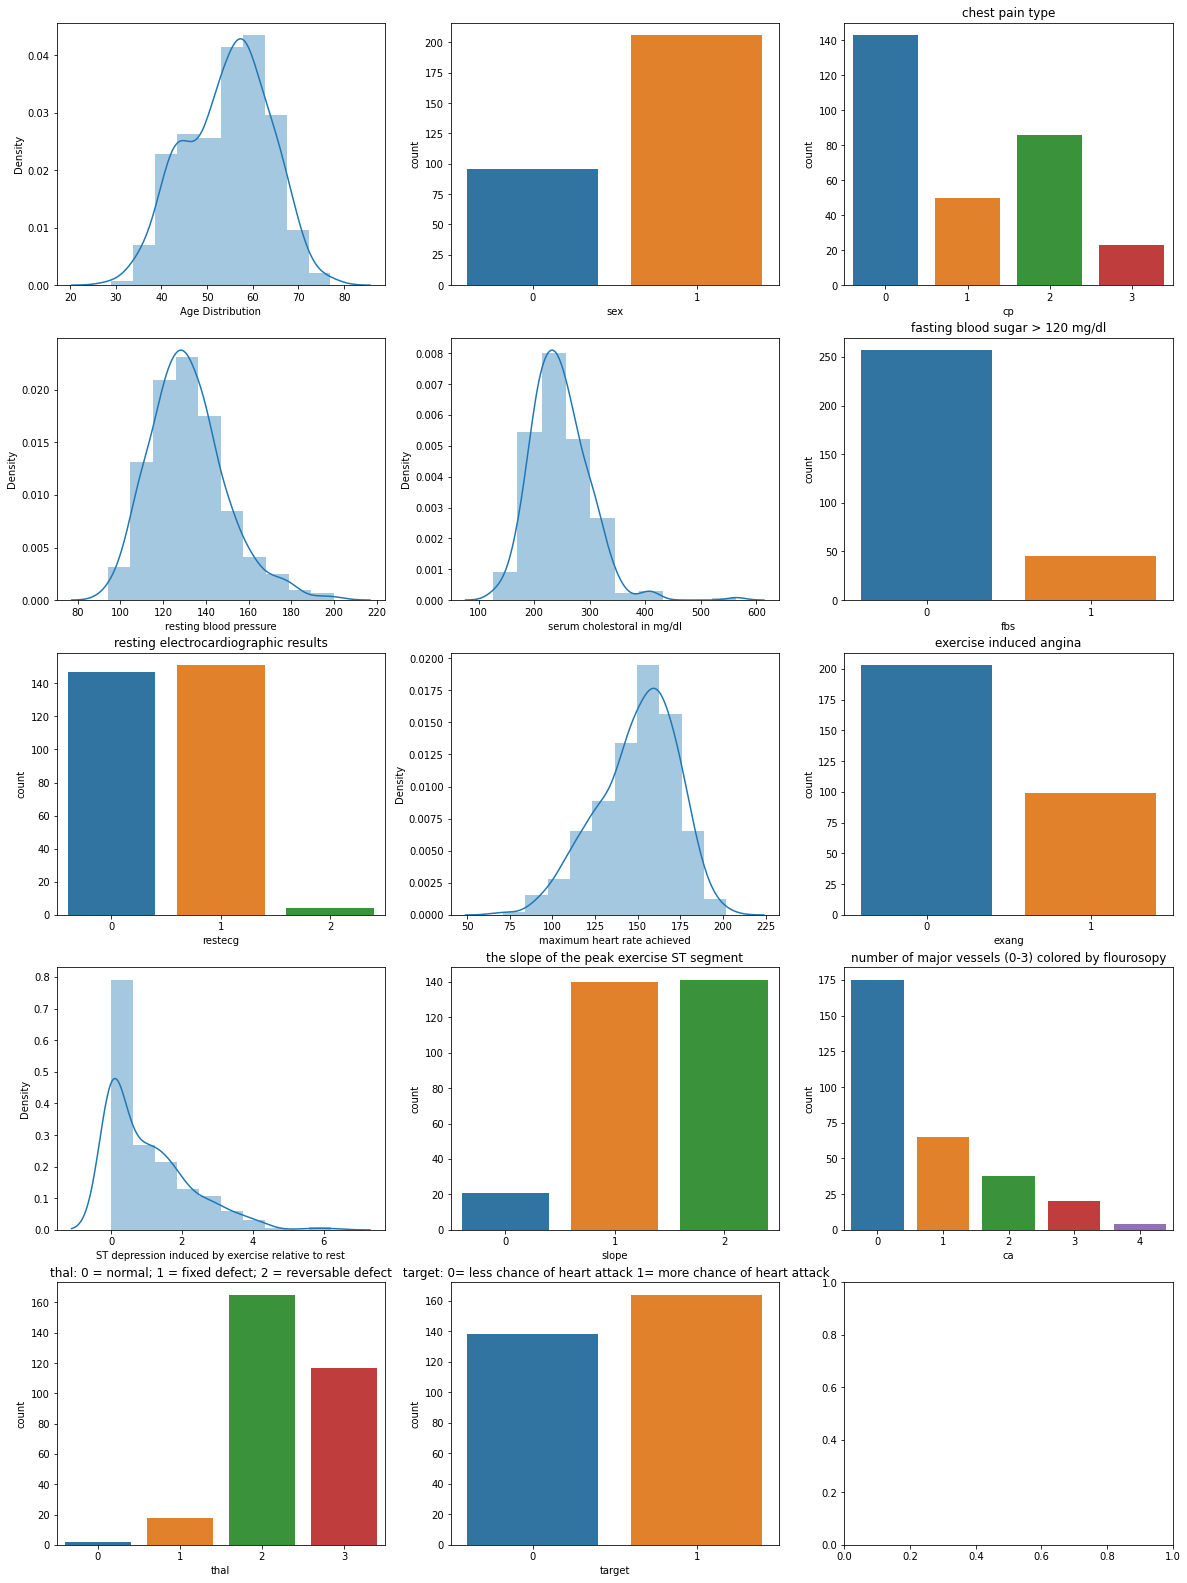

In [7]:
fig, ax=plt.subplots(5,3,figsize=(20,28))
sns.distplot(heart_disease['age'],bins=10,ax=ax[0,0],axlabel='Age Distribution')
sns.countplot(x="sex", data=heart_disease,ax=ax[0,1])
sns.countplot(x="cp", data=heart_disease,ax=ax[0,2])
sns.distplot(heart_disease['trestbps'],bins=10,ax=ax[1,0],axlabel='resting blood pressure')
sns.distplot(heart_disease['chol'],bins=10,ax=ax[1,1],axlabel='serum cholestoral in mg/dl')
sns.countplot(x="fbs", data=heart_disease,ax=ax[1,2])
sns.countplot(x="restecg", data=heart_disease,ax=ax[2,0])
sns.distplot(heart_disease['thalach'],bins=10,ax=ax[2,1],axlabel='maximum heart rate achieved')
sns.countplot(x="exang", data=heart_disease,ax=ax[2,2])
sns.distplot(heart_disease['oldpeak'],bins=10,ax=ax[3,0],axlabel='ST depression induced by exercise relative to rest')
sns.countplot(x='slope',data=heart_disease,ax=ax[3,1])
sns.countplot(x='ca',data=heart_disease,ax=ax[3,2])
sns.countplot(x='thal',data=heart_disease,ax=ax[4,0])
sns.countplot(x='target',data=heart_disease,ax=ax[4,1])
ax[4,1].set_title(' target: 0= less chance of heart attack 1= more chance of heart attack')
ax[4,0].set_title('thal: 0 = normal; 1 = fixed defect; 2 = reversable defect')
ax[3,2].set_title('number of major vessels (0-3) colored by flourosopy')
ax[3,1].set_title('the slope of the peak exercise ST segment')
ax[2,2].set_title('exercise induced angina')
ax[1,2].set_title("fasting blood sugar > 120 mg/dl")
ax[0,2].set_title("chest pain type")
ax[2,0].set_title('resting electrocardiographic results')

<a id='model'></a>
# 2. Modeling
<a href=#top>(back to top)</a>

### Data cleaning
Check for missing value

At a glance of the table, we know there is not any `null/NAN` value in the DataFrame, which is good.

In [9]:
heart_disease.replace(to_replace= r'^\s*$', value=np.nan,regex=True, inplace=True ) #replace any unit value that only contains " ", space
heart_disease.isnull().any() #check whether each column contains a missing value

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Then if there is any unit that only contains " " or space value, it will be replaced by a `NAN value`. After the replacement, we check again if there is any `null value`. Fortunately, the data are clean.

### 2.1.2 Logistic Regression

`logistic regression` model is also suitable for binary classification problem.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'sklearn'

In [20]:
features_train2,features_test2,target_train2,target_test2 = train_test_split(X_encode_scaled,y,test_size=0.2,random_state=42,stratify=y)

NameError: name 'train_test_split' is not defined

#### Model construction

In [14]:
logreg=LogisticRegression(max_iter=3000) # set the max iteration to be 3000 otherwise the process can't be finished
logreg.fit(features_train2,target_train2)
target_pred2=logreg.predict(features_test2)

NameError: name 'LogisticRegression' is not defined

#### Evaluate model
Using test dataset to plot ROC curve

In [15]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(features_test2)[:,1]
fpr, tpr, thresholds = roc_curve(target_test2,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [16]:
cv_scores=cross_val_score(logreg,X_encode_scaled,y,cv=5,scoring='roc_auc')
print('AUC of logistic model is ',cv_scores.mean())

NameError: name 'cross_val_score' is not defined

Confusion Matrix and classification report

In [17]:
C_logistic=confusion_matrix(
    target_test2,   # array, Gound true (correct) target values
    target_pred2,  # array, Estimated targets as returned by a classifier
    labels=[0,1],        # array, List of labels to index the matrix.
    sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
)
pd.DataFrame(C_logistic,columns=col_name,index=row_name)

NameError: name 'confusion_matrix' is not defined

In [18]:
plot_confusion_matrix(C_logistic,['low risk','high risk'], "Logistic Regression Confusion Matrix")
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

In [19]:
print(classification_report(target_test2,target_pred2))

NameError: name 'classification_report' is not defined

From above we can see the model performance is 91.5% with *accuracy* 0.87, and it also perform well on the `confusion matrix`. What is more, it also performs well on the ROC curve, which means it has high true positive rate and also has low false positive rate. It indicates that model can perform well on classification and filter.

#### Probability calculation from logistic regression model

In [ ]:
def Probability2(features):
    y_pred_prob = logreg.predict_proba(features)[:,1]
    return pd.DataFrame(y_pred_prob)

In [ ]:
Probability2(features_test2)

In this way we can not only find the binary result, but also find the actual predicted probability of heart disease for the given feature.